# Sistema Solar Binário

## Descrição do problema a ser analizado

Um sistema solar binário é um sistema solar que consiste em duas estrelas orbitando seu centro de massa, como as estrelas representam a maior parte da massa do sistema o resto do sistema também orbita o centro de massa. O problema consiste em descrever orbitas binárias utilizando o python. Para facilitar o problema consideraremos o problema em 2-D.


### Classificação

Para o sistema binário a estrela mais brilhante é chamada de estrela primária enquanto a outra é chamada de secundária. Também é possível classificá-las de acordo com a orbita em que chamamos de **binárias amplas** aquelas em que as estrelas ficam separadas pela orbita de forma que não há troca de massas entre elas e **binárias próximas** em que pela proximidade há troca de massa entre as estrelas.

Existem dois tipos de orbitas para um planeta em um sistema binário: A **Tipo-P(Circumbinária)** em que o planeta orbita o centro de massa das duas estrelas. e a **Tipo-S(Não circumbinária)** em que o planeta orbita uma das estrelas e a outra gera perturbações na orbita.

## Formalização matemática do problema

Para descrever o problema é necessário utilizar a gravitação de dois corpos clássica e aplicá-la ao problema das orbitas. Para isto utilizamos a equação da força gravitacional que um corpo a aplica em um corpo b:
$$ F_{ab}=\frac{-G m_a m_b(\vec{R_b}-\vec{R_a})}{(|\vec{R_b}-\vec{R_a}|)^3}$$

Fazemos isso para cada um dos corpos do sistema para
determinar as equacões de movimento do sistema. 

então para:
$$
X=
\begin{bmatrix}
 \vec{R_n} \\ \vec{v_n}
\end{bmatrix}
_{2n\times 1}
$$

temos que:
$$ 
\dot{X}=
\begin{bmatrix}
 \vec{v_n} \\ \dot{\vec{v_n}}
\end{bmatrix}
_{2n\times 1}$$
e
$$
\dot{\vec{v_j}}=-G\sum_{i\neq j}^n m_i \frac{\vec{R_j}-\vec{R_i}}{(|\vec{R_j}-\vec{R_i}|)^3}
$$
Então definindo uma função para $X$ podemos utilizar o metodo de Runge-Kutta de 4ª ordem e assim com as posições e velocidades iniciais
podemos resolver numericamente o problema.

## Implementação do problema em python

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy import constants
from astropy import units
import vpython

###  (Sistema Circumbinário Kepler-16)

Valores iniciais:

In [47]:
G = constants.G.value # Constante da Gravitacao
n=3 #Numero de corpos
M=np.zeros(n)
M[0] = (0.6897*units.Msun).decompose().value # Massa da primeira estrela em Massas Solares
M[1] = (0.20225*units.Msun).decompose().value # Massa da segunda estrela em Massas Solares
M[2] = (0.333*units.Mjup).decompose().value # Massa do planeta em Massas de Jupiter
mu = (M[0] * M[1])/(M[0] + M[1]) #Massa reduzida das estrelas

Definição da função $\frac{dX}{dt}$:



In [51]:
#Formula Geral (para o problema escrito em 3 dimensões)
def dxdt(X, t):
    n=len(X)//2
    a=np.zeros(n)
    for i in range(n//3):
        for j in range(n//3):
            if i!=j:
                a[3*i:3*(1+i)]+=-G*M[j]*(X[i*3:3*(1+i)]-X[j*3:3*(1+j)])/np.linalg.norm(X[i*3:3*(1+i)]-X[j*3:3*(1+j)])**3
    return np.hstack((X[n:],a))

Utilizando o referencial do centro de massa:

In [49]:
a_S = (0.22431 * units.AU).decompose().value # Distancia inicial das estrelas (semi-eixo maior) em Unidade Astronomica
a_P = (0.7048 * units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica

P = 2*np.pi*np.sqrt((a_S**3)/(G*(M[0] + M[1]))) # Periodo da orbita das estrelas (entre si) pela terceira lei de kepler
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
#P = (41.079220*units.d).decompose().value # Periodo da orbita das estrelas(entre si) em dias
#P_p = (228.776*units.d).decompose().value # Periodo da orbita do planeta em torno das estrelas em dias

r_1 = -a_S*(mu/M[0]) # Posicao relativa da primeira estrela
r_2 = a_S*(mu/M[1]) # Posicao relativa da segunda estrelas
r_p = a_P # Posicao do planeta

v_1 = 2*np.pi*r_1/P # Velocidade inicial da estrela 1
v_2 = 2*np.pi*r_2/P # Velocidade inicial da estrela 2
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta
#v_1 = np.sqrt(2*G*M_1/abs(r_1))
#v_2 = -np.sqrt(2*G*M_2/abs(r_2))
#v_p = np.sqrt(2*G*M_1/abs(r_1)) + np.sqrt(2*G*M_2/abs(r_2))

X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

## Aplicações e Resultados

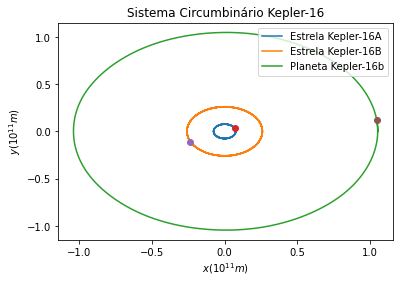

In [50]:
t_orbit = np.linspace(0, P_p, 1000)

trajetoria = odeint(dxdt, X, t_orbit)*1E-11

plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend()
plt.show()